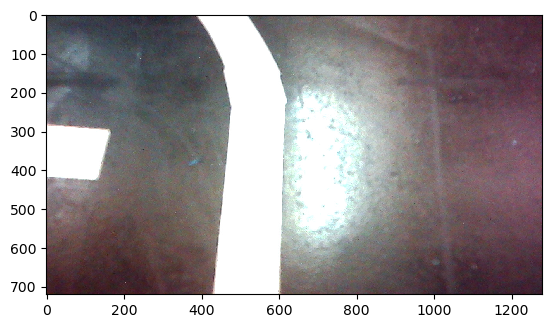

In [184]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interact_manual, IntSlider, FloatSlider

image_path = "glare.jpeg"
image = cv2.imread(image_path)

treshed = None
eroded = None

plt.imshow(image)

In [185]:
def treshhold(treshA=0, treshB=255):
    global image
    global treshed
    a, b = treshA, treshB
    lower_bgr_values = np.array([a,  a,  a])
    upper_bgr_values = np.array([b, b, b])

    treshed = cv2.inRange(image, lower_bgr_values, upper_bgr_values)
    plt.imshow(treshed)

interact(treshhold, treshA=IntSlider(min=1, max=255, step=1, value=100),
                     treshB=IntSlider(min=0, max=255, step=1, value=255))


interactive(children=(IntSlider(value=100, description='treshA', max=255, min=1), IntSlider(value=255, descrip…

<function __main__.treshhold(treshA=0, treshB=255)>

In [186]:
def erode(size=10):
    global treshed
    global eroded
    kernel = np.ones((size, size), np.uint8)
    eroded = cv2.erode(treshed, kernel)
    plt.imshow(eroded)

interact(erode, size=IntSlider(min=0, max=30, step=1, value=0))

interactive(children=(IntSlider(value=0, description='size', max=30), Output()), _dom_classes=('widget-interac…

<function __main__.erode(size=10)>

In [187]:
MIN_AREA = 10000
MIN_AREA_TRACK = 30000
MAX_CONTOUR_VERTICES = 50

def getContour(eps=1.5):
    """
    Return the centroid of the largest contour in
    the binary image 'mask' (the line)
    and draw all contours on 'out' image
    """

    global image
    global eroded
    out = image.copy()

    # get a list of contours
    contours, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    mark = {}
    line = {}
    over = False
    tried_once = False

    possible_tracks = []
    for contour in contours:
        M = cv2.moments(contour)
        # Search more about Image Moments on Wikipedia 🙂 (it's the 'center')

        contour = cv2.approxPolyDP(contour, eps, True)
        contour_vertices = len(contour)


        if (M['m00'] < MIN_AREA):
            continue

        if (contour_vertices < MAX_CONTOUR_VERTICES) and (M['m00'] > MIN_AREA_TRACK):

            # Contour is part of the track
            line['x'] = int(M["m10"]/M["m00"])
            line['y'] = int(M["m01"]/M["m00"])

            possible_tracks.append(line)

            # plot the amount of vertices in light blue
            # cv2.drawContours(out, contour, -1, (255,255,0), 2)
            cv2.drawContours(out, [contour], -1, (255,255,0), 2)
            cv2.putText(out, f"({contour_vertices}){M['m00']}", (int(M["m10"]/M["m00"]), int(M["m01"]/M["m00"])-200),
                cv2.FONT_HERSHEY_PLAIN, 3, (100,100,255), 2)

        else:
            # plot the area in pink
            # cv2.drawContours(out, contour, -1, (255,0,255), 2)
            cv2.drawContours(out, [contour], -1, (255,0,255), 2)
            cv2.putText(out, f"({contour_vertices}){M['m00']}", (int(M["m10"]/M["m00"]), int(M["m01"]/M["m00"])),
                cv2.FONT_HERSHEY_PLAIN, 3, (100,100,255), 2)

    for line in possible_tracks:
        cv2.circle(out, (line['x'], line['y']), 5, (0,255,0), 5)

    plt.imshow(out)

interact(getContour, eps=FloatSlider(min=0, max=15, step=0.1, value=0.5))

interactive(children=(FloatSlider(value=0.5, description='eps', max=15.0), Output()), _dom_classes=('widget-in…

<function __main__.getContour(eps=1.5)>